In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

In [6]:
# Load Dataset
file_path = 'Dataset-terbaru.csv'  # Ganti dengan path file Anda
dataset = pd.read_csv(file_path)

In [7]:
# Data Cleaning
def clean_numeric_column(column):
    return column.str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'], format='%d/%m/%Y')
dataset['Terakhir'] = clean_numeric_column(dataset['Terakhir'])
dataset['Pembukaan'] = clean_numeric_column(dataset['Pembukaan'])
dataset['Tertinggi'] = clean_numeric_column(dataset['Tertinggi'])
dataset['Terendah'] = clean_numeric_column(dataset['Terendah'])
dataset['Perubahan%'] = dataset['Perubahan%'].str.replace('%', '').str.replace(',', '.').astype(float)
dataset = dataset.drop(columns=['Vol.'], errors='ignore')

In [8]:
# Aggregate Monthly Data
dataset['Month'] = dataset['Tanggal'].dt.to_period('M')
monthly_data = dataset.groupby('Month').agg({
    'Terakhir': 'mean',
    'Pembukaan': 'mean',
    'Tertinggi': 'mean',
    'Terendah': 'mean',
    'Perubahan%': 'mean'
}).reset_index()

In [9]:
# Clustering with K-Means
optimal_k = 3  # Jumlah cluster
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
features = monthly_data.drop(columns=['Month']).values
monthly_data['Cluster'] = kmeans.fit_predict(features)

In [10]:
# Evaluasi Performa Model
dbs = davies_bouldin_score(features, kmeans.labels_)  # Davies-Bouldin Score
ss = silhouette_score(features, kmeans.labels_)  # Silhouette Score
inertia = kmeans.inertia_  # Inertia
chs = calinski_harabasz_score(features, kmeans.labels_)  # Calinski-Harabasz Index

In [11]:
# Cetak Hasil Evaluasi Performa
print("\nEvaluasi Performa Model:")
print(f"Davies-Bouldin Score: {dbs}")
print(f"Silhouette Score: {ss}")
print(f"Inertia (Sum of Squared Distances): {inertia}")
print(f"Calinski-Harabasz Index: {chs}")


Evaluasi Performa Model:
Davies-Bouldin Score: 0.10854719416175346
Silhouette Score: 0.3762441059780483
Inertia (Sum of Squared Distances): 1.8168122863526036e+16
Calinski-Harabasz Index: 28.100114141018647


In [12]:
# Menentukan Bulan untuk Analisis
print("Pilih bulan yang tersedia untuk analisis:")
print(monthly_data['Month'].astype(str).tolist())

Pilih bulan yang tersedia untuk analisis:
['2024-09', '2024-10', '2024-11', '2024-12']


In [14]:
# Input dari pengguna
selected_month = input("Masukkan bulan yang ingin dianalisis (format: YYYY-MM): ")

Masukkan bulan yang ingin dianalisis (format: YYYY-MM):  2024-10


In [15]:
# Filter Data untuk Bulan yang Dipilih
selected_data = monthly_data[monthly_data['Month'].astype(str) == selected_month]

if selected_data.empty:
    print(f"Bulan {selected_month} tidak ditemukan dalam dataset.")
else:
    # Analisis Pergerakan
    cluster_label = selected_data['Cluster'].iloc[0]
    if cluster_label == 0:
        movement = "Pergerakan harga cenderung **turun**."
    elif cluster_label == 1:
        movement = "Pergerakan harga cenderung **naik**."
    else:
        movement = "Pergerakan harga cenderung **sideways**."

    print(f"\nAnalisis Bulan {selected_month}:")
    print(movement)


Analisis Bulan 2024-10:
Pergerakan harga cenderung **naik**.


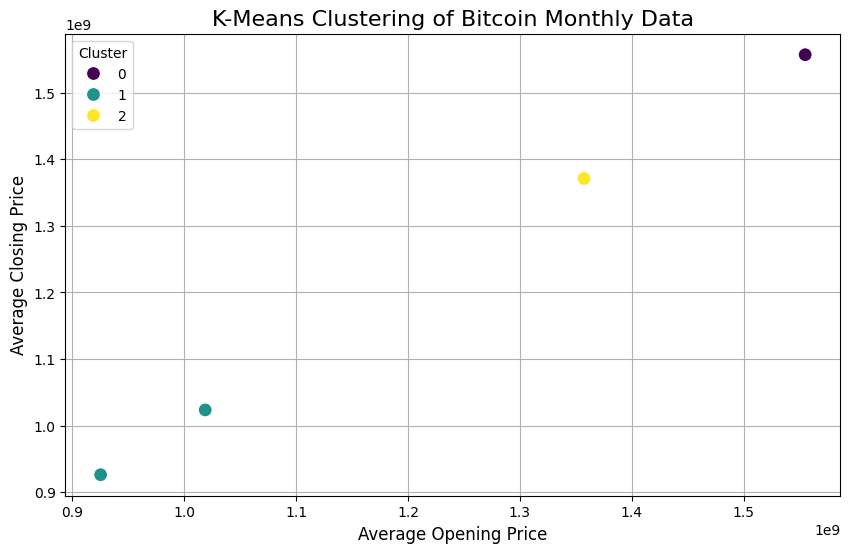

In [16]:
# Visualisasi Scatter Plot Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=monthly_data['Pembukaan'],
    y=monthly_data['Terakhir'],
    hue=monthly_data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('K-Means Clustering of Bitcoin Monthly Data', fontsize=16)
plt.xlabel('Average Opening Price', fontsize=12)
plt.ylabel('Average Closing Price', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [17]:
# Filter Data Harian untuk Bulan yang Dipilih
daily_data = dataset[dataset['Tanggal'].dt.to_period('M') == selected_month]

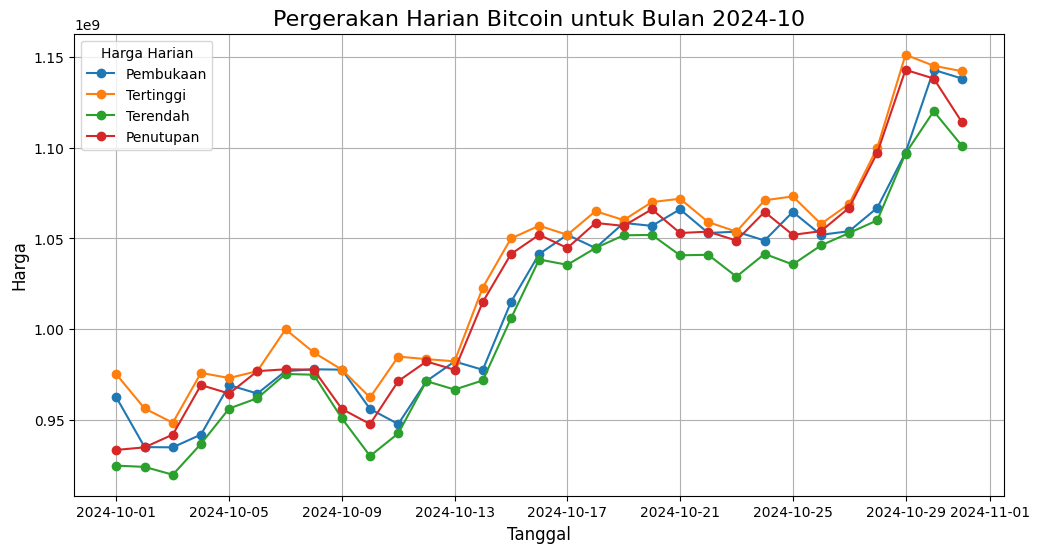

In [18]:
 # Visualisasi Data Harian
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Tanggal'], daily_data['Pembukaan'], label='Pembukaan', marker='o')
plt.plot(daily_data['Tanggal'], daily_data['Tertinggi'], label='Tertinggi', marker='o')
plt.plot(daily_data['Tanggal'], daily_data['Terendah'], label='Terendah', marker='o')
plt.plot(daily_data['Tanggal'], daily_data['Terakhir'], label='Penutupan', marker='o')
plt.title(f'Pergerakan Harian Bitcoin untuk Bulan {selected_month}', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.legend(title='Harga Harian')
plt.grid(True)
plt.show()

In [19]:
# Tampilkan Data Harian
print("\nDetail Data Harian:")
print(daily_data[['Tanggal', 'Pembukaan', 'Tertinggi', 'Terendah', 'Terakhir']])


Detail Data Harian:
      Tanggal     Pembukaan     Tertinggi      Terendah      Terakhir
41 2024-10-31  1.138000e+09  1.142030e+09  1.101000e+09  1.114001e+09
42 2024-10-30  1.142762e+09  1.144999e+09  1.120008e+09  1.138000e+09
43 2024-10-29  1.097221e+09  1.151088e+09  1.096696e+09  1.142762e+09
44 2024-10-28  1.066885e+09  1.099998e+09  1.060000e+09  1.097221e+09
45 2024-10-27  1.054000e+09  1.068998e+09  1.053013e+09  1.066885e+09
46 2024-10-26  1.051989e+09  1.058000e+09  1.046165e+09  1.054000e+09
47 2024-10-25  1.064599e+09  1.073118e+09  1.035673e+09  1.051989e+09
48 2024-10-24  1.048843e+09  1.071000e+09  1.041511e+09  1.064599e+09
49 2024-10-23  1.053738e+09  1.053738e+09  1.029000e+09  1.048843e+09
50 2024-10-22  1.053001e+09  1.058999e+09  1.041007e+09  1.053738e+09
51 2024-10-21  1.066026e+09  1.071849e+09  1.040729e+09  1.053001e+09
52 2024-10-20  1.056918e+09  1.070008e+09  1.051947e+09  1.066026e+09
53 2024-10-19  1.058527e+09  1.060100e+09  1.051739e+09  1.056918e+09